In [2]:
 #!pip install --upgrade pip
 #!pip3 install tensorflow
 #!pip3 install torch torchvision

## Time to get your hands dirty. Galaxies vs quasars with neural networks.

Let's go back to our galaxy vs quasar data we've used in a previous exercise. 

1. Read in SDSS galaxy color data from `solutions/galaxyquasar.csv`. Create arrays for the $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create an array with the class labels where galaxy=$0$ and quasar=$1$. 

2. Now we're going to fit a neural network classifier. First, scale your data appropriately and do a 30% train/test split.

3. Now train the classifier. Use one the package among those we've seen. These include Tensorflow via keras, pytorch, and the MPL classifier implemented in scikit-learn. This is an opportunity to pick the one you're most interested in learning. 

3. Start from a network architecture with a single hidden layer with 5 neurons, using the `adam` solver, the `relu` activation function, and a learninig rate of `0.001`. Plot the resulting ROC curve. 

4. Now let's optimize the hyperparameters of your network. Explore different hyperparameters and see what fits the data best.  Do your best now to optimize the network architecture. Be creative!

5. Is your best result comparable with the simpler classifiers we've seen before? Do we need deep learning here? If yes, which features are captured best?


A few tips:

- In scikit-learn, remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.
- If it takes too long, run the hyperparameter optimization on a subset of the training set. Then retrain the full network using the best hyperparameters only.
- On cross validation, for scikit learn we've seen how to use `GridSearchCV` already. For Tensorflow, there's a really cool tool called [Tensorboard](https://www.tensorflow.org/tensorboard)

In [1]:
import setuptools.dist
import tensorflow as tf
from sklearn.metrics import roc_curve, auc
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import deepdish

#import  torch, torchvision

2024-10-25 00:38:33.608872: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-25 00:38:33.691491: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-25 00:38:33.716311: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-25 00:38:33.869475: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-25 00:38:35.869234: W tensorflow/compiler/tf2

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('../solutions/galaxyquasar.csv')

u_g = data['u'] - data['g']
g_r = data['g'] - data['r']
r_i = data['r'] - data['i']
i_z = data['i'] - data['z']

labels = data['class'].apply(lambda x: 0 if x == 'GALAXY' else 1)

features = pd.DataFrame({'u-g': u_g, 'g-r': g_r, 'r-i': r_i, 'i-z': i_z})


In [3]:
data

,u,g,r,i,z,class,z1,zerr
0,18.97213,18.53676,18.58280,18.34936,18.29215,QSO,0.522819,0.000155
1,19.24592,17.47646,16.47817,16.04472,15.68851,GALAXY,0.122846,0.000028
2,19.43536,17.70268,16.91565,16.58327,16.39128,GALAXY,0.000000,0.000000
3,19.31626,18.18312,17.39591,16.94549,16.65395,GALAXY,0.147435,0.000009
4,19.28828,19.11188,18.88937,18.80013,18.49183,QSO,2.011455,0.000631
...,...,...,...,...,...,...,...,...
49995,19.37295,18.12382,17.39886,16.98503,16.70585,GALAXY,0.113016,0.000011
49996,18.52021,16.88262,16.03280,15.56884,15.22454,GALAXY,0.085063,0.000014
49997,18.62718,17.30876,16.87371,16.62399,16.42296,GALAXY,0.054429,0.000008
49998,19.55140,18.27711,17.62101,17.21947,17.03347,GALAXY,0.112571,0.000009


In [4]:
#let's scale them
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.3, random_state=42)

In [5]:
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std
X_test = (X_test - X_mean) / X_std



In [10]:
filename='trained.keras'

if not os.path.isfile(filename):
        
    my_init = keras.initializers.glorot_uniform(seed=1)
    model = keras.Sequential( [
                # Input layer, do not change
                tf.keras.layers.InputLayer(input_shape=np.shape(X_train[0])),
                # Inner layers, can add/change
                keras.layers.Dense(5,  activation='relu',kernel_initializer=my_init),
                #keras.layers.Dense(16,  activation='tanh',kernel_initializer=my_init),
                #keras.layers.Dense(8,  activation='tanh',kernel_initializer=my_init),
                # Output layer, do not change
                keras.layers.Dense(1, activation='sigmoid',kernel_initializer=my_init)])


    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    def scheduler(epoch, lr):
                if epoch < 10:
                    return float(lr)
                else:
                    return float(lr * tf.math.exp(-0.05))

    # Train the model
    history = model.fit(X_train, y_train,
                        epochs=50, batch_size=10, validation_data=(X_test, y_test),
                        callbacks = [
                            # Drecrease learning rate
                            tf.keras.callbacks.LearningRateScheduler(scheduler),
                            # Store the model with the best validation accuracy
                            tf.keras.callbacks.ModelCheckpoint(
                                filepath=filename,
                                save_weights_only=False,
                                monitor='val_accuracy',
                                mode='max',
                                save_best_only=True),
                            # Save logfiles for tensorboard
                            tf.keras.callbacks.TensorBoard(log_dir="logs"+filename.split('.h5')[0], histogram_freq=1)],
                        
                        # Shuffle data at each epoch
                        shuffle=True)

    # Load the best model
    model = keras.models.load_model(filename)


In [11]:
# predict probabilities
y_pred_prob = model.predict(X_test).ravel()  #(ravel flattens the array), can also use squeeze


469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step


In [12]:
model.save("my_keras_model.keras")

model = keras.models.load_model("my_keras_model.keras")

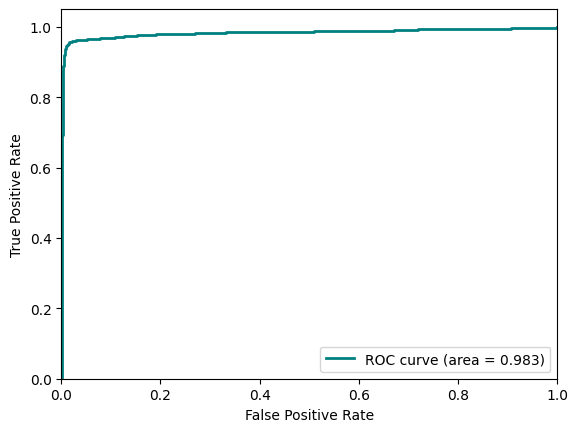

In [13]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='teal', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [14]:
# print the classification score:

print('Classification score: ', model.evaluate(X_test, y_test)[1])

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9826 - loss: 0.0774
Classification score:  0.9839333295822144


## Let's now find the best hyperparameters for the network, cross validation with Tensorboard:

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import itertools


# Define a function to create and compile the model
def create_model(neurons, learning_rate):
    model = keras.Sequential([
        keras.layers.InputLayer(input_shape=np.shape(X_train[0])),
        keras.layers.Dense(neurons, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [22]:
# Define the hyperparameters to search
param_grid = {
    'neurons': np.arange(5, 20, 5),
    'learning_rate': [0.001, 0.01, 0.1],
    #'activation': ['relu', 'tanh']
    #'batch_size': [16, 32, 64],
    #'epochs': [10, 20, 50, 100]
}

# all combinations of hyperparameters
param_combinations = list(itertools.product(*param_grid.values()))

best_accuracy = 0
best_params = None
best_model = None

In [24]:
for params in param_combinations:
    neurons, learning_rate = params

    model = create_model(neurons, learning_rate)
    
    log_dir = f"logs/hp_search_{neurons}_{learning_rate}"
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=16,
        validation_split=0.2,
        callbacks=[tensorboard_callback],
        verbose=0
    )
    
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params
        best_model = model

print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)


/home/malvi/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Best parameters: (15, 0.01)
Best accuracy: 0.9854666590690613


In [27]:
# Train the final model with best parameters
neurons, learning_rate = best_params
batch_size = 10
epochs = 50


final_model = create_model(neurons, learning_rate)

final_log_dir = "logs/final_model"
final_tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=final_log_dir, histogram_freq=1)

final_history = final_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=[final_tensorboard_callback]
)

# Evaluate the final model
train_loss, train_accuracy = final_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = final_model.evaluate(X_test, y_test, verbose=0)

print(f"Final Model - Train Accuracy: {train_accuracy:.4f}")
print(f"Final Model - Test Accuracy: {test_accuracy:.4f}")

# Save the final model
final_model.save('best_model.keras')

/home/malvi/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9768 - loss: 0.1130 - val_accuracy: 0.9836 - val_loss: 0.0747
Epoch 2/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9820 - loss: 0.0733 - val_accuracy: 0.9844 - val_loss: 0.0753
Epoch 3/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9836 - loss: 0.0624 - val_accuracy: 0.9809 - val_loss: 0.0948
Epoch 4/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9834 - loss: 0.0713 - val_accuracy: 0.9797 - val_loss: 0.1619
Epoch 5/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9833 - loss: 0.0727 - val_accuracy: 0.9849 - val_loss: 0.0793
Epoch 6/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9841 - loss: 0.0665 - val_accuracy: 0.9839 - val_loss: 0.0973
Epoch 7/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9835 - loss: 0.0622 - val_accuracy: 0.9833 - val_loss: 0.0969
Epoch 8/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9844 - loss: 0.0757 -

## while with the RandomForest I got:

In [17]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf.fit(X_train, y_train)

# Evaluate the model
rf_train_accuracy = rf.score(X_train, y_train)
rf_test_accuracy = rf.score(X_test, y_test)

print(f"Random Forest Train Accuracy: {rf_train_accuracy:.4f}")
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.4f}")


Random Forest Train Accuracy: 1.0000
Random Forest Test Accuracy: 0.9864
